In [58]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

In [2]:
df = pd.read_csv('stories.csv',
                   sep='\t', encoding='utf8',
                   index_col='id')

In [3]:
print(df)

                                                   title  published  \
id                                                                    
2                                     Это был не металл!   20090910   
4                                 Интернет — он большой!   20090915   
5                            Атака одушевленного обьекта   20090915   
6                                 Мы его почти победили!   20091006   
8                                          На фирму Маше   20091006   
9                              Я все-таки не разобралась   20091006   
10               Решительность против вдумчивого подхода   20091009   
13                                     Клуб по интересам   20091009   
15                                    Раз уж предлагаете   20091010   
16                               Простое мужское счастье   20091010   
17                      За банку варенья и пачку печенья   20091010   
18                                  Вокруг CMYK'а за час   20091011   
19    

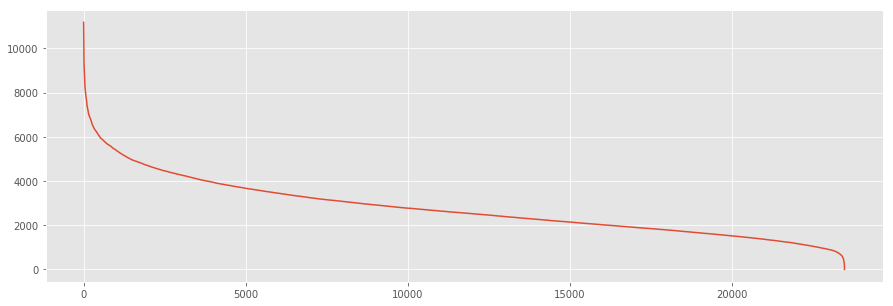

In [4]:
like_plot = list(df.sort_values('likes', ascending=False)['likes'])
plt.plot(like_plot)

In [41]:
from collections import Counter
tags, values_tags = zip(*sorted(Counter([word for tag in df['tags'] for word in tag.split(' ')]).items(), key=lambda x: x[1], reverse=True))
for tag, q in zip(tags[:10], values_tags[:10]):
    print('{0} & {1} \\\\'.format(tag, q))

women & 2793 \\
transport & 2055 \\
men & 1566 \\
friends & 1544 \\
internet & 1518 \\
healthcare & 1516 \\
education & 1461 \\
leisure & 1440 \\
kids & 1415 \\
relatives & 1303 \\


In [35]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
word_counts_titles = Counter([word for text in df['title'] for word in tokenizer.tokenize(text) if len(word) > 3])
print(*[word[0] for word in word_counts_titles.most_common(10)])

меня только всех быть есть надо лучше жизни будет себе


In [11]:
word_counts_titles = Counter([word for text in df['title'] for word in tokenizer.tokenize(text) if len(word) > 3 and word[0].isupper()])
print(word_counts_titles.most_common(30))

[('Когда', 69), ('Только', 62), ('Если', 62), ('Один', 51), ('Жизнь', 50), ('Лучше', 46), ('День', 43), ('Есть', 42), ('Пять', 41), ('Пусть', 41), ('Ничего', 35), ('Всем', 35), ('Право', 34), ('Спасибо', 34), ('Одна', 32), ('России', 31), ('Больше', 30), ('Мама', 30), ('Человек', 29), ('Хорошо', 27), ('Будь', 27), ('Просто', 27), ('Любовь', 27), ('Куда', 27), ('Красота', 26), ('Десять', 26), ('Дело', 26), ('Нельзя', 25), ('Давайте', 25), ('Дети', 25)]


In [10]:
word_counts = Counter([word for text in df['text'] for word in tokenizer.tokenize(text) if len(word) > 3])
print(word_counts.most_common(100))

[('меня', 31752), ('если', 17208), ('только', 16830), ('есть', 13598), ('чтобы', 13323), ('когда', 13107), ('просто', 12989), ('даже', 12070), ('надо', 10677), ('которые', 10044), ('было', 10032), ('можно', 9420), ('люди', 8901), ('очень', 8856), ('будет', 8686), ('потому', 8222), ('себя', 8170), ('время', 7814), ('может', 7621), ('тоже', 7357), ('вообще', 7330), ('задолбали', 7295), ('себе', 7225), ('Если', 7142), ('того', 7005), ('этом', 6837), ('почему', 6711), ('человек', 6635), ('быть', 6538), ('потом', 6425), ('день', 6342), ('больше', 6329), ('нужно', 6238), ('ничего', 6237), ('этого', 5968), ('всех', 5962), ('людей', 5931), ('после', 5922), ('тебя', 5713), ('который', 5554), ('тебе', 5377), ('могу', 5230), ('один', 5132), ('через', 5118), ('всего', 4848), ('такой', 4820), ('деньги', 4820), ('этот', 4568), ('ведь', 4528), ('хочу', 4488), ('всегда', 4475), ('знаю', 4472), ('жизни', 4469), ('нибудь', 4443), ('сейчас', 4270), ('Почему', 4257), ('пока', 4095), ('хотя', 4090), ('како

In [16]:
print('Has {0} words in total.'.format(sum(word_counts.values())))

Has 4041730 words in total.


In [31]:
story_lengths = [len(list(tokenizer.tokenize(text))) for text in df['text']]
print(sorted(story_lengths, reverse=True))

[1399, 1392, 1384, 1368, 1351, 1344, 1343, 1334, 1332, 1329, 1323, 1298, 1286, 1279, 1260, 1226, 1211, 1209, 1201, 1192, 1191, 1185, 1169, 1166, 1160, 1150, 1149, 1146, 1145, 1139, 1134, 1133, 1123, 1123, 1122, 1111, 1109, 1102, 1101, 1097, 1090, 1089, 1088, 1080, 1077, 1075, 1073, 1071, 1069, 1068, 1064, 1055, 1051, 1043, 1039, 1039, 1037, 1030, 1028, 1028, 1027, 1025, 1023, 1023, 1022, 1021, 1020, 1013, 1010, 1009, 1008, 1008, 1008, 1008, 1004, 1003, 1003, 1000, 998, 992, 990, 989, 988, 986, 984, 980, 980, 972, 971, 970, 970, 969, 968, 968, 965, 963, 960, 959, 958, 955, 951, 950, 950, 946, 944, 944, 942, 941, 940, 937, 936, 936, 934, 933, 933, 930, 925, 925, 922, 921, 920, 920, 916, 916, 915, 914, 913, 912, 912, 911, 911, 910, 910, 908, 906, 903, 894, 893, 893, 892, 889, 889, 889, 887, 885, 885, 884, 883, 883, 882, 881, 880, 880, 879, 879, 879, 878, 877, 875, 873, 873, 872, 871, 869, 868, 868, 866, 865, 865, 865, 864, 863, 863, 863, 863, 862, 862, 862, 861, 861, 860, 859, 858, 857, 8

In [32]:
print(sum(story_lengths) / len(story_lengths)) 

270.15293566653895


In [56]:
from collections import defaultdict
likes_by_tags = defaultdict(list)
for index, row in df.iterrows():
    for tag in row['tags'].split(' '):
        likes_by_tags[tag].append(row['likes'])

In [76]:
mean_likes_by_tag = []

for k, v in likes_by_tags.items():
    mean_likes_by_tag.append((k, np.mean(v), len(v)))

print(sorted(mean_likes_by_tag, key=lambda x: x[1], reverse=True)[:10])
    
for tag, likes, q in sorted(mean_likes_by_tag, key=lambda x: x[1], reverse=True)[:10]:
    print('{0} & {1:.2f} \\\\'.format(tag, likes))

[('cops', 3927.0071428571428, 140), ('kids', 3668.9759717314487, 1415), ('religion', 3404.5689655172414, 290), ('men', 3380.1960408684545, 1566), ('relatives', 3329.3330775134305, 1303), ('household', 3322.9331140350878, 912), ('neighbors', 3223.5214723926379, 489), ('state', 3217.1653611836377, 1149), ('golden-age', 3111.9548192771085, 332), ('animals', 3088.7084048027446, 583)]
cops & 3927.01 \\
kids & 3668.98 \\
religion & 3404.57 \\
men & 3380.20 \\
relatives & 3329.33 \\
household & 3322.93 \\
neighbors & 3223.52 \\
state & 3217.17 \\
golden-age & 3111.95 \\
animals & 3088.71 \\


In [64]:
for tag, q in zip(tags[:10], values_tags[:10]):
    print('{0} & {1} \\\\'.format(tag, q))

women & 2793 \\
transport & 2055 \\
men & 1566 \\
friends & 1544 \\
internet & 1518 \\
healthcare & 1516 \\
education & 1461 \\
leisure & 1440 \\
kids & 1415 \\
relatives & 1303 \\


In [71]:
len(tags)

63

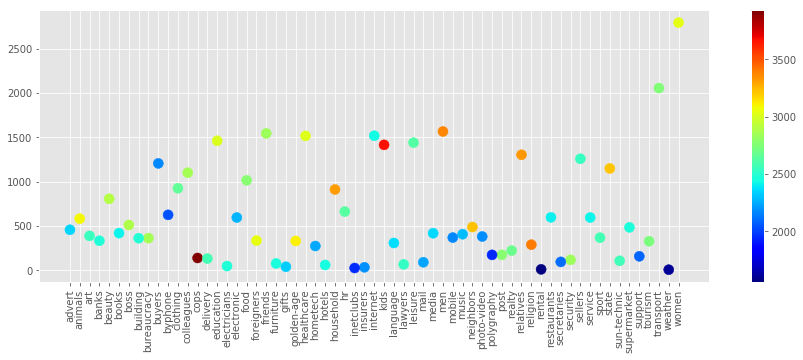

In [97]:
top = sorted(mean_likes_by_tag, key=lambda x: x[1], reverse=True)

plt.scatter(x=[t[0] for t in top], y=[t[2] for t in top], c=[t[1] for t in top], cmap='jet', s=100)
plt.xticks([t[0] for t in top], [t[0] for t in top], rotation='vertical')
plt.colorbar()
plt.show()